## Example of use

Here we present an example of use for our EEG simulator framework, and using its output to test the python implementation of FourierICA (https://www.cs.helsinki.fi/group/neuroinf/code/fourierica/html/fourierica.html) and the modification the allows to improve its performance.

In [1]:
import sys
sys.path.insert(0,'../src')
from utils import *
from fica import *
from eeggen import *


Initialize the class EEGGenerator. The internal variables of the class control the parameters of the signal. We use a lead field matrix calculated using sample subject on MNE, with 60 channels and 498 sources.

In [2]:
eegGen = EEGGenerator()
eegGen.calculate()

Calculating and displaying the spectral power of the sources

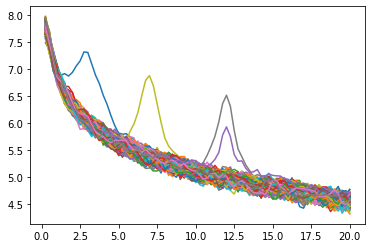

In [3]:
oSc, params = toSpec(eegGen.getSources(), eegGen.Fs, eegGen.minfreq, eegGen.maxfreq,4)

plt.plot(eegGen.ff, np.log(np.squeeze(np.mean(np.abs(oSc),1))))
plt.show()
del oSc

Calculating and displaying the spectral power of the EEG sensors

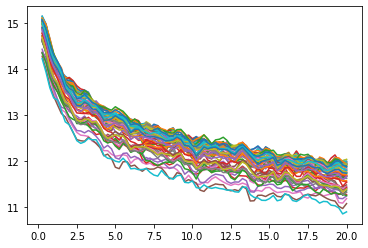

In [4]:
oSc, params = toSpec(eegGen.getEEG(), eegGen.Fs, eegGen.minfreq, eegGen.maxfreq,4)

plt.plot(eegGen.ff, np.log(np.squeeze(np.mean(np.abs(oSc),1))))
plt.show()
del oSc

Calculating fourierICA with original setting

Outlier removal:
 removed  237  windows

0.00018294732442991624
4.6914218902016636e-05
1.5894284786099888e-05
1.0316995372461335e-05
7.1498554194970865e-06
4.439089976271404e-06
4.049440449849229e-06
2.0236026975206656e-06
1.5036672238455395e-06
1.3550577456777901e-06
1.1428449162576015e-06
9.936816681710425e-07
7.627520919317732e-07
6.577663071993811e-07
5.987200740742438e-07
6.341076929095024e-07
6.825198169968516e-07
6.334846556210749e-07
4.679115941375045e-07
3.3697611345751e-07
3.2044648068385584e-07
3.195789055610021e-07
2.6715217438244565e-07
1.9176743393245488e-07
1.3969824674830988e-07
1.1590553372631263e-07
1.0607662392914108e-07
1.0017063822864714e-07
9.309061432816179e-08
8.391304040511471e-08
7.538295854203625e-08
7.053106076959637e-08
7.05797678079989e-08
7.510343036365441e-08
8.271607787602164e-08
9.485804608466708e-08
1.168611974966538e-07
1.5697204314157887e-07
2.2232601237792693e-07
2.9546688806725285e-07
3.0460849487212727e-07
2.707551779446149e-07
2.3052982311977388

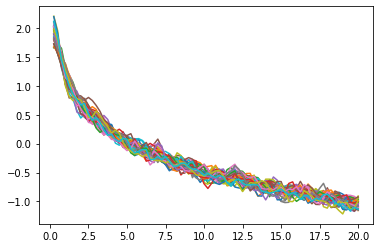

In [5]:
fica = fourierICA(eegGen, 40)
fica.normSpec = False
fica.processEEGGenerator()
X = fica.getResults()

Calculating fourierICA with modification

Outlier removal:
 removed  10  windows

0.0528664717578915
0.00011756286878239486
2.9720671324562353e-05
9.116687837318338e-06
9.567734343796097e-06
3.876529700574949e-06
6.761964961632394e-06
8.307142262964362e-07
5.145689035979117e-07
5.086931225140034e-07
6.118715092373606e-07
1.039883924747187e-06
1.0909857076635276e-06
5.656905059936435e-07
1.8016628544614832e-07
7.038533555991933e-08
6.572776811708536e-08
7.408283908549862e-08
6.250012440922603e-08
3.549537075375753e-08

Converged.

get results with X = fica.getResults()


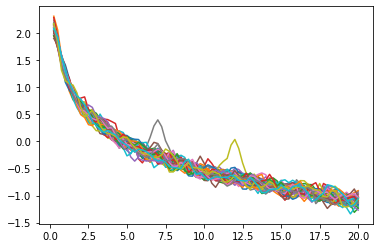

In [6]:
fica2 = fourierICA(eegGen, 40)
fica2.normSpec = True
fica2.processEEGGenerator()
X = fica2.getResults()